In [90]:
import ipywidgets as widgets
from IPython.display import display

%load_ext autoreload
%autoreload 2
%matplotlib inline
import risk_kit as rk
import pandas as pd
import numpy as np
import matplotlib as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


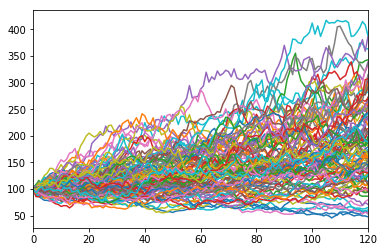

In [76]:
rk.gbm(10, 100).plot(legend=False)

In [77]:
def show_gbm(n_scenarios, mu, sigma):
    """Draw the results of a stock price evolution
    undet Geometric Brownian Motion mode"""
    
    s_0 = 100
    prices = rk.gbm(n_scenarios=n_scenarios,
                   mu=mu, sigma=sigma, s_0=s_0)
    ax = prices.plot(legend=False, color='indianred', 
                    alpha=0.5, linewidth=2, figsize=(12, 5))
    ax.axhline(y=s_0, ls=':', color='black')
    ax.set_ylim(top=400)
    #draw a dot at the origin
    ax.plot(0, s_0, marker='o', color='darkred', alpha=0.2)

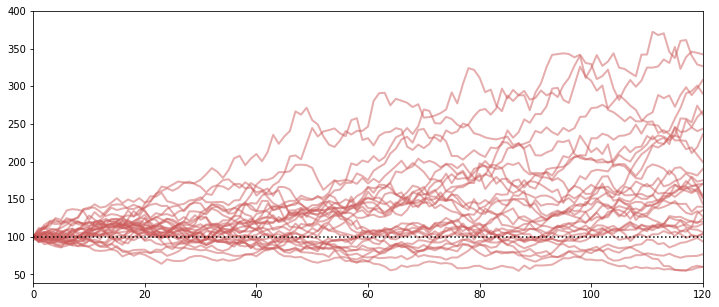

In [78]:
show_gbm(30, 0.07, 0.15)

In [79]:
gbm_controls = widgets.interactive(show_gbm, 
                                   n_scenarios=(1, 100, 5),
                                   mu=(-0.2, 0.2, 0.01),
                                   sigma=(0, 0.3, 0.01)
                                  )

In [80]:
display(gbm_controls)

interactive(children=(IntSlider(value=46, description='n_scenarios', min=1, step=5), FloatSlider(value=0.0, de…

### Interactive CPPI Simulation 

In [93]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15,
             m=3, floor=0., riskfree_rate=0.03, y_max=100):
    """Plot the results of a Monte Carlo Simulation for CPPI"""
    
    start = 100
    sim_rets = rk.gbm(n_scenarios=n_scenarios, mu=mu,
                     sigma=sigma, prices=False, steps_per_year=12)
    
    risky_r = pd.DataFrame(sim_rets)
    
    # run the back-test
    btr = rk.run_cppi(risky_r=pd.DataFrame(risky_r),
                      riskfree_rate=riskfree_rate, m=m,
                      start=start, floor=floor)
    
    wealth = btr['Wealth']
    y_max = wealth.values.max() * y_max / 100
    
    # plot
    ax = wealth.plot(legend=False, alpha=0.3, 
                     color='indianred', figsize=(12,6))
    ax.axhline(y=start, ls=':', color='black')
    ax.axhline(y=start*floor, ls='--', color='red')
    ax.set_ylim(top=y_max)



    
    
cppi_controls = widgets.interactive(show_cppi,
                                    n_scenarios=widgets.IntSlider(min=1, max=100, 
                                                                  step=1, value=50),
                                    mu=(0, +.2, 0.01),
                                    sigma=(0, 0.30, 0.05),
                                    floor=(0, 2, 0.1), 
                                    m=(1, 5, 0.5),
                                    riskfree_rate=(0, 0.05, 0.01),
                                    y_max = widgets.IntSlider(min=0, max=100, 
                                                              step=1, value=100,
                                                              description='Zoom Y Axis'))

display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', min=1), FloatSlider(value=0.07, descripti…

In [92]:
1600*0.02

32.0